# # Context



This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.




The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

Liabilities are what the bank owes to others. Specifically, the bank owes any deposits made in the bank to those who have made them. However, the asset products are those in which the customer is liable to pay to the bank. The products include:

Any type of loans like personal loan, car loan, education loan, etc.
Credit card, etc.


In this case, the bank wants more clients to become loan customers. If they borrow loan from the bank, they will become asset customers instead of only being liability customers.



The data set includes 5000 observations with fourteen variables divided into four different measurement categories. The binary category has five variables, including the target variable personal loan, also securities account, CD account, online banking and credit card. The interval category contains five variables: age, experience, income, CC avg and mortgage. The ordinal category includes the variables family and education. The last category is nominal with ID and Zip code. The variable ID does not add any interesting information e.g. individual association between a person (indicated by ID) and loan does not provide any general conclusion for future potential loan customers. Therefore, it will be neglected in the examination.



By analyzing the bank’s current databases, we can investigate what factors are influencing people’s loan decisions. Income, education, property, or age? After exploring the data and building machine learning predictive models, our bank can have a clear strategy plan of targeting what types of customers in order to enlarge our asset customers groups. 


### DATA DESCRIPTION: The data consists of the following attributes:
1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data1 = pd.read_csv("/users/arissa/Desktop/data 4/Data1.csv")
data2 = pd.read_csv("/users/arissa/Desktop/data 4/Data2.csv")

In [4]:
data1

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2
...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3
4996,4997,30,4,15,92037,4,0.4,1
4997,4998,63,39,24,93023,2,0.3,3
4998,4999,65,40,49,90034,3,0.5,2


In [5]:
data2

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...
4995,4996,0,0,0,1,0,0.0
4996,4997,85,0,0,1,0,0.0
4997,4998,0,0,0,0,0,0.0
4998,4999,0,0,0,1,0,0.0


In [6]:
cust_data=data1.merge(data2, how='inner', on='ID')

In [8]:
data=cust_data

In [9]:
data

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [10]:
data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [12]:
data.isna().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [13]:
data=data.drop(columns='ID')

In [14]:
data

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [15]:
data=data.dropna()

In [16]:
data

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


## Exploratory Data Analysis

<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

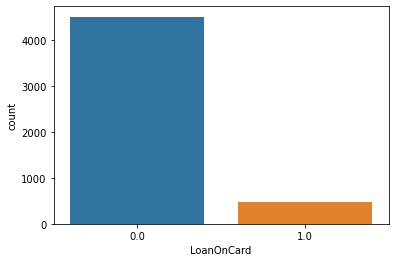

In [18]:
sns.countplot(x='LoanOnCard', data=data)

In [17]:
data['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

#### This shows clearly data is highly imbalanced.

## Comment: Data imbalance is a typical problem in machine learning. Later we shall use it's impact when we develop ML models.

<AxesSubplot:xlabel='HighestSpend', ylabel='MonthlyAverageSpend'>

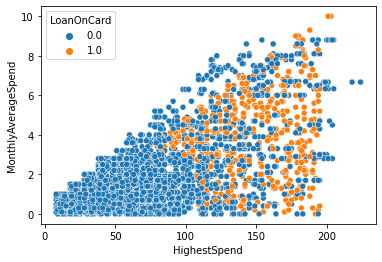

In [23]:
graph=sns.scatterplot(x="HighestSpend", y='MonthlyAverageSpend', hue="LoanOnCard",
               data=data,legend='full')
graph

In [31]:
data.loc[data.LoanOnCard == 0.0, 'Mortgage'].sum()

233411

In [32]:
data.loc[data.LoanOnCard == 1.0, 'Mortgage'].sum()

48406

In [35]:
data.groupby('LoanOnCard').agg({'Mortgage':['sum']})

,Mortgage
,sum
LoanOnCard,
0.0,233411
1.0,48406


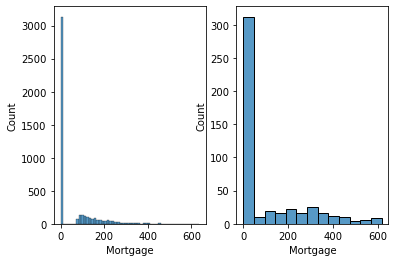

In [41]:
fig, ax = plt.subplots(1, 2)
sns.histplot(data.loc[cust_data.LoanOnCard == 0.0, 'Mortgage'], ax = ax[0])
sns.histplot(data.loc[cust_data.LoanOnCard == 1.0, 'Mortgage'], ax = ax[1])
plt.show()

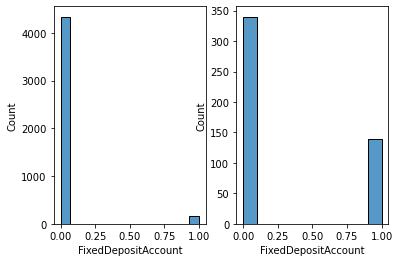

In [44]:
fig, ax = plt.subplots(1, 2)
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 0.0, 'FixedDepositAccount'], ax = ax[0])
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 1.0, 'FixedDepositAccount'], ax = ax[1])
plt.show()

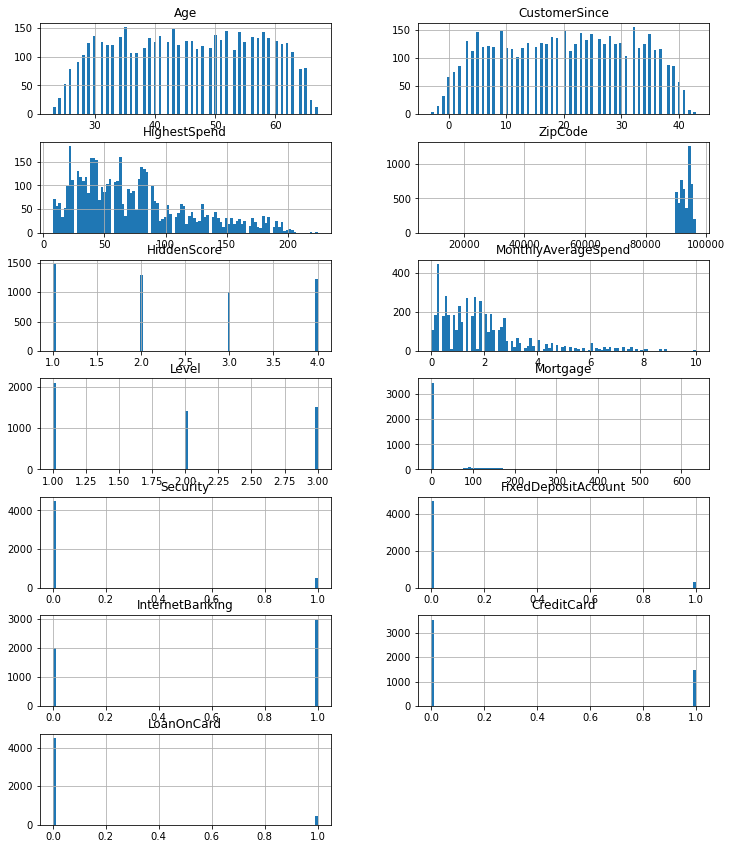

In [52]:
# create 2da
columns=list(data.columns)
cust_data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

In [53]:
## ZipCode doesn't have too much information
data=data.drop(columns='ZipCode')

In [56]:
data.corr()['LoanOnCard']

Age                   -0.008147
CustomerSince         -0.007801
HighestSpend           0.502626
HiddenScore            0.061761
MonthlyAverageSpend    0.366912
Level                  0.137010
Mortgage               0.141947
Security               0.021982
FixedDepositAccount    0.316131
InternetBanking        0.006034
CreditCard             0.002536
LoanOnCard             1.000000
Name: LoanOnCard, dtype: float64

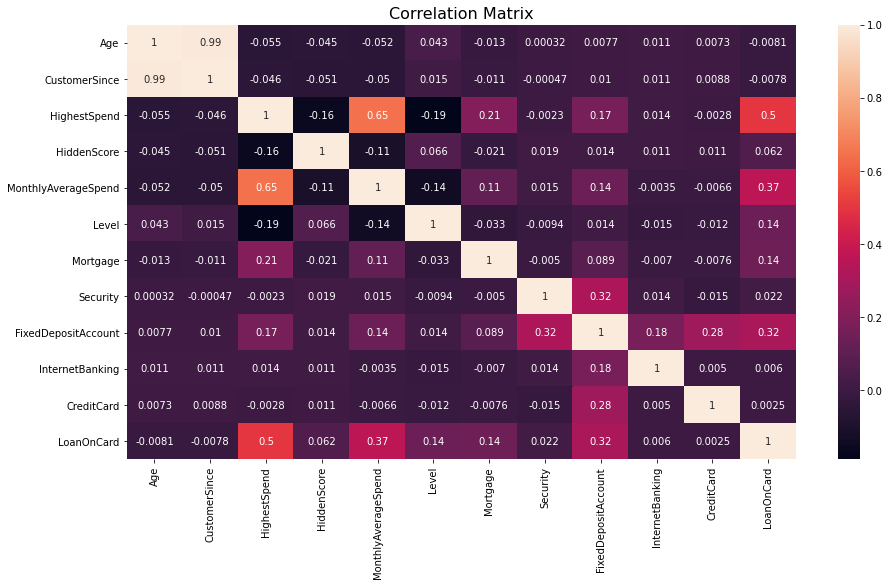

In [60]:
plt.figure(figsize=(15,8))
corr = data.corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show();

In [61]:
### As "Age" and "customerSince" are highly correlated, we can drop 1. I am dropping "Age"

In [64]:
cust_data = cust_data.drop(columns='Age')

## Spliting the data 


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X=data.drop('LoanOnCard', axis=1)
Y=data['LoanOnCard']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

In [71]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [75]:
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_

In [76]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9431057563587684


In [77]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9431057563587684
Confusion Matrix: 
[[1320   21]
 [  64   89]]
Area Under Curve: 0.7830196955739791
Recall score: 0.5816993464052288
Precision score: 0.8090909090909091
f1 score: 0.67680608365019


### For minority class, the above model is able to predict 86 correctly, out of 153. Although the accuracy is high, still the model is not a good model. We need to handle the unbalanced data 

In [79]:
## Weighted Logistic Regression to handle class inbalance
w={0:1, 1:2}
# Fit the model on train
model_weighted = LogisticRegression(solver="liblinear", class_weight=w)
model_weighted.fit(x_train, y_train)


#predict on test
y_predict = model_weighted.predict(x_test)

In [80]:
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9410977242302544
Confusion Matrix: 
[[1303   38]
 [  50  103]]
Area Under Curve: 0.822432776242488
Recall score: 0.673202614379085
Precision score: 0.7304964539007093
f1 score: 0.7006802721088436


### Although the accuracy decreases, AUC and recall increases significantly, hence, it is a better model. Hence we select "model_weighted".

## Naive bayes algorithm

In [82]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
diab_model = GaussianNB()

diab_model.fit(x_train, y_train)

GaussianNB()

In [83]:
diab_train_predict = diab_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

Model Accuracy: 0.8873



In [84]:
y_predict = diab_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict)))
print()

Model Accuracy: 0.8815



In [85]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')

Accuracy Score: 0.8815261044176707
Confusion Matrix: 
[[1230  111]
 [  66   87]]
Area Under Curve: 0.742926700881695
Recall score: 0.5686274509803921


In [91]:
diab_model_cp = GaussianNB(priors=[0.1, 0.9])
#diab_model.class_prior_ = [0.9, 0.1]
diab_model_cp.fit(x_train, y_train)
y_predict = diab_model_cp.predict(x_test)

In [92]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')

Accuracy Score: 0.8172690763052208
Confusion Matrix: 
[[1080  261]
 [  12  141]]
Area Under Curve: 0.8634688774838792
Recall score: 0.9215686274509803


## Support Vector Machines

In [93]:
from sklearn import svm
clf = svm.SVC(gamma=0.25, C=10)
clf.fit(x_train , y_train)
y_predict = clf.predict(x_test)

### gamma is a measure of influence of a data point. It is inverse of distance of influence. 
### C is penalty of wrong classifications

In [94]:
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.8982597054886211
Confusion Matrix: 
[[1341    0]
 [ 152    1]]
Area Under Curve: 0.5032679738562091
Recall score: 0.006535947712418301
Precision score: 1.0
f1 score: 0.012987012987012988


In [95]:
x_test

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
4378,38,12,45,4,1.20,2,138,0,0,1,0
268,64,39,129,1,2.50,1,0,0,0,1,0
3906,61,35,60,1,2.50,3,0,0,0,1,0
4099,61,35,60,1,2.80,2,0,0,0,1,1
3011,55,31,63,3,2.67,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2930,41,17,78,4,2.67,1,99,0,0,1,0
618,63,37,42,2,0.70,3,115,0,0,1,0
4515,29,3,49,4,2.10,3,0,0,0,0,0
406,45,19,125,1,2.40,1,0,0,0,0,0


## Decision Tree Classifier

In [97]:
# Build decision tree model
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [98]:
# Scoring our DT
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.9832663989290495


In [99]:
y_predict = dTree.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9832663989290495
Confusion Matrix: 
[[1333    8]
 [  17  136]]
Area Under Curve: 0.9414615958240118
Recall score: 0.8888888888888888
Precision score: 0.9444444444444444
f1 score: 0.9158249158249158


In [100]:
#Reducing over fitting (Regularization)
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.9902467010900746
0.9819277108433735


In [101]:
y_predictR = dTreeR.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_predictR)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predictR)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predictR)}')
print(f'Recall score: {recall_score(y_test,y_predictR)}')
print(f'Precision score: {precision_score(y_test,y_predictR)}')
print(f'f1 score: {f1_score(y_test,y_predictR)}')

Accuracy Score: 0.9819277108433735
Confusion Matrix: 
[[1335    6]
 [  21  132]]
Area Under Curve: 0.9291354125542836
Recall score: 0.8627450980392157
Precision score: 0.9565217391304348
f1 score: 0.9072164948453608


## Plot Decision Tree

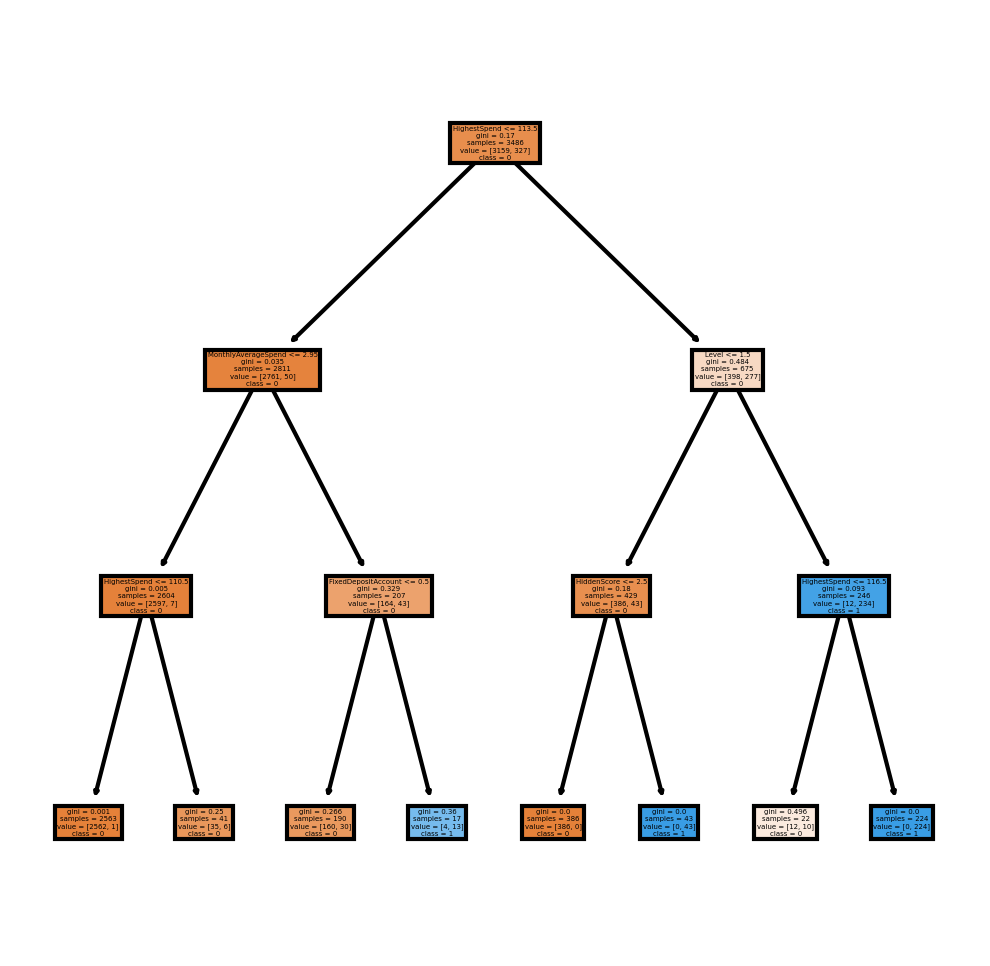

In [104]:
# Decision Tree Visualize
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
dTreeR3 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR3.fit(x_train, y_train)
fn = list(x_train)
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTreeR3, feature_names = fn, class_names=cn, filled = True);


## Random forest classifier


In [105]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(random_state=1)
rfcl = rfcl.fit(x_train, y_train)
y_predict = rfcl.predict(x_test)

In [106]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9859437751004017
Confusion Matrix: 
[[1340    1]
 [  20  133]]
Area Under Curve: 0.934267666798263
Recall score: 0.869281045751634
Precision score: 0.9925373134328358
f1 score: 0.926829268292683


## Imbalanced Data Handling

In [108]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [109]:
Counter(Y)

Counter({1.0: 480, 0.0: 4500})

In [111]:
# define pipeline
over = SMOTE(sampling_strategy=0.3,random_state=1) #sampling_strategy=0.1,random_state=1
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [ ('o', over),('u', under)]
pipeline = Pipeline(steps=steps)

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()
scaled_data=scaler.fit_transform(X)

In [116]:
# transform the dataset
Xb, Yb = pipeline.fit_resample(scaled_data, Y)
# summarize the new class distribution
counter = Counter(Yb)
print(counter)

Counter({0.0: 2700, 1.0: 1350})


In [117]:
x_trainb, x_testb, y_trainb, y_testb = train_test_split(Xb, Yb, test_size=0.3, random_state=1)


## SVM with balanced Data

In [118]:
clf = svm.SVC(gamma=0.25, C=10)
clf.fit(x_trainb , y_trainb)
y_predictb = clf.predict(x_testb)

In [119]:
# performance
print(f'Accuracy Score: {accuracy_score(y_testb,y_predictb)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_testb, y_predictb)}')
print(f'Area Under Curve: {roc_auc_score(y_testb, y_predictb)}')
print(f'Recall score: {recall_score(y_testb,y_predictb)}')
print(f'Precision score: {precision_score(y_testb,y_predictb)}')
print(f'f1 score: {f1_score(y_testb,y_predictb)}')

Accuracy Score: 0.9777777777777777
Confusion Matrix: 
[[796  19]
 [  8 392]]
Area Under Curve: 0.9783435582822085
Recall score: 0.98
Precision score: 0.9537712895377128
f1 score: 0.9667077681874229


## Random Forest classifier with Balanced Data

In [120]:
rfcl = RandomForestClassifier(random_state=1)
rfcl = rfcl.fit(x_trainb, y_trainb)
y_predict = rfcl.predict(x_testb)

In [121]:
print(f'Accuracy Score: {accuracy_score(y_testb,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_testb, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_testb, y_predict)}')
print(f'Recall score: {recall_score(y_testb,y_predict)}')
print(f'Precision score: {precision_score(y_testb,y_predict)}')
print(f'f1 score: {f1_score(y_testb,y_predict)}')

Accuracy Score: 0.9843621399176955
Confusion Matrix: 
[[809   6]
 [ 13 387]]
Area Under Curve: 0.980069018404908
Recall score: 0.9675
Precision score: 0.9847328244274809
f1 score: 0.9760403530895334


### Chosing hyperparameter using Grid Search

In [122]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.25,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_trainb,y_trainb)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

After completing data analysis and machine learning algorithm tests, we have several summaries which can be very helpful for our marketing and finance teams to increase the numbers of asset costumes.


Based on the correlation matrix, we can find that  “Highest Spend” (Customer’s highest spend so far in one transaction), “Monthly average spend”, and “fixed deposit account” have the highest correlation with whether the customer has a loan on a credit card. 

It is noticeable that income level and spending level directly influence whether an individual decides to borrow a loan from banks. If our marketing team wants to increase asset customers dramatically, focusing on those people who spend more money and have higher deposit amounts in our bank. I am sure that this group of people have more ability to borrow loans and return loans, and also, they are more easily convinced to borrow different types of loans, for example, car, housing and education, to satisfy their current needs.

So! If you are a mortgage advisor or loan product advisor, you can target this group of customers to recommend our loan products and services at our bank. 

Our machine learning predictions also perform very well in this case. When the data is imbalanced, we should not focus on accuracy score, and instead, we should see recall, precision score, and f1 score. Decision tree classifier has almost built a very good model, and after applying techniques to deal with imbalance data, our prediction can reach a 98% accuracy score, and recall, precision, and f1 score are also more than 0.97. Overall, this is a very optimal model to help us predict whether this customer will have a high chance of becoming our asset customers. 
